In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import pandas as pd
from sklearn.metrics import mean_squared_error

import plotly.io as pio
pio.renderers.default = 'iframe'

## Step 2: Generate Sample Data

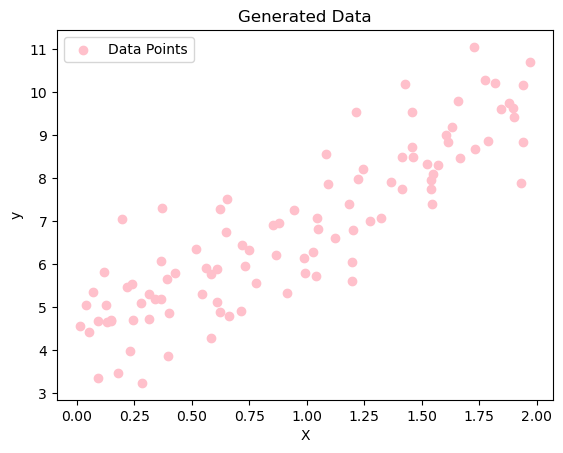

In [2]:

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Visualize the data
plt.scatter(X, y, color='pink', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.legend()
plt.show()

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
sgd_reg = SGDRegressor(max_iter=1000, eta0=0.1)
sgd_reg.fit(X_scaled, y.ravel())

SGDRegressor(eta0=0.1)

In [10]:
print(f"Intercept: {sgd_reg.intercept_}")
print(f"Coefficient: {sgd_reg.coef_}")

Intercept: [6.85030453]
Coefficient: [1.58604293]


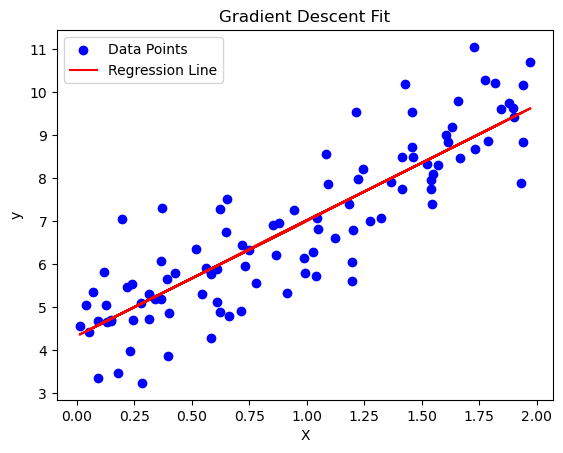

In [7]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, sgd_reg.predict(X_scaled), color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent Fit')
plt.legend()
plt.show()

In [11]:
def cost_function(m, b, X, y):
    predictions = m * X + b
    return np.mean((predictions - y) ** 2)

m_values = np.linspace(-10, 10, 100)
b_values = np.linspace(-10, 10, 100)
M, B = np.meshgrid(m_values, b_values)

Z = np.array([[cost_function(m, b, X, y) for m, b in zip(row_m, row_b)] for row_m, row_b in zip(M, B)])

fig = go.Figure(data=[go.Surface(z=Z, x=M, y=B, colorscale='Viridis')])
fig.update_layout(scene=dict(
    xaxis_title='Slope (m)',
    yaxis_title='Intercept (b)',
    zaxis_title='Cost (MSE)'
),
    title='',
    height=800 
)
fig.show()

In [12]:
m_updates = [-8, -5, -2, 0.5, 2]
b_updates = [-8, -4, -1, 1, 3]
cost_updates = [cost_function(m, b, X, y) for m, b in zip(m_updates, b_updates)]

df_cost = pd.DataFrame({
    'm': m_updates,
    'b': b_updates,
    'cost': cost_updates
})


fig.add_trace(go.Scatter3d(
    x=m_updates,
    y=b_updates,
    z=cost_updates,
    mode='markers+lines',
    marker=dict(size=5, color='red'),
    line=dict(color='red', width=2),
    name='Parameter Updates'
))

fig.show()

In [13]:
df_cost

,m,b,cost
0,-8.0,-8,540.663291
1,-5.0,-4,262.892110
2,-2.0,-1,102.885046
3,0.5,1,31.233259
4,2.0,3,4.775245


# ++

In [11]:
X = 2 * np.random.randint(0, 50, size=100).astype(np.float32)
y = 4 + 3 * X ** 2

In [12]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)    

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaler = StandardScaler()
y = scaler.fit_transform(y)

In [14]:
# del GD_model
GD_model = SGDRegressor(max_iter=1, eta0=0.001, warm_start=True)

In [15]:
out = []
m_updates = []
b_updates = []
cost_updates = []

for i in range(100):
    GD_model.fit(X, y)

    _m = GD_model.coef_[0]
    _b = GD_model.intercept_[0]
    _cost = mean_squared_error(y, GD_model.predict(X))
    m_updates.append(_m)
    b_updates.append(_b)
    cost_updates.append(_cost)

    out.append([i, _m, _b, _cost])
    # print(out[-1])

m_updates = np.array(m_updates)
b_updates = np.array(b_updates)
cost_updates = np.array(cost_updates)

df_2 = pd.DataFrame(out, columns=["itteration", "m", "b", "MSE"])
df_2

/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/opt/conda/envs/py39_ml/lib/python3.9/site-packages/

,itteration,m,b,MSE
0,0,0.040266,0.000706,0.924101
1,1,0.078533,0.000979,0.854975
2,2,0.112749,-0.000485,0.795646
3,3,0.147342,-0.000884,0.738046
4,4,0.179679,-0.000164,0.686364
...,...,...,...,...
95,95,0.944277,0.000226,0.073720
96,96,0.945130,-0.000142,0.073690
97,97,0.945011,-0.000370,0.073694
98,98,0.945704,-0.000330,0.073670


In [21]:
Z.max(), Z.min(), M.max()

(0.07365337920546886, 0.07365337920546886, 0.9462222456932068)

In [22]:
m_values = np.linspace(m_updates.min(), m_updates.max(), 100)
b_values = np.linspace(b_updates.min(), b_updates.max(), 100)
M, B = np.meshgrid(m_values, b_values)

Z = np.array([[mean_squared_error(y, GD_model.predict(X)) for m, b in zip(row_m, row_b)] for row_m, row_b in zip(M, B)])

fig = go.Figure(data=[go.Surface(z=Z, x=M, y=B, colorscale='Viridis')])
fig.update_layout(scene=dict(
    xaxis=dict(title='Slope (m)', range=[m_updates.min(), m_updates.max()]),
    yaxis=dict(title='Intercept (b)', range=[b_updates.min(), b_updates.max()]),
    zaxis=dict(title='Cost (MSE)', range=[Z.min(), Z.max()]) 
),
    title='',
    height=800  
)
fig.show()